In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv("cleaned-loan.csv")

In [3]:
data.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0.0,0.0,1.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1,1,1.0,1.0,1.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2,1,1.0,0.0,1.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3,1,1.0,0.0,0.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4,1,0.0,0.0,1.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [4]:
del data["Unnamed: 0"]

In [5]:
data.shape

(614, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 57.7 KB


In [40]:
from sklearn.model_selection import train_test_split

X = data.drop("Loan_Status", axis = 1)
y = data["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier

dTreeModel = DecisionTreeClassifier()

In [10]:
dTreeModel.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score

y_pred = dTreeModel.predict(X_train)

In [25]:
accuracy_score(y_train, y_pred)

1.0

In [13]:
y_pred_test = dTreeModel.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred_test,)

0.6378378378378379

In [21]:
confusion_matrix(y_test, y_pred_test,)

array([[30, 35],
       [32, 88]], dtype=int64)

In [18]:
y_pred_test

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.])

In [19]:
y_test

350    1.0
377    1.0
163    1.0
609    1.0
132    1.0
      ... 
380    1.0
446    1.0
144    1.0
290    1.0
353    0.0
Name: Loan_Status, Length: 185, dtype: float64

In [28]:
preproned = DecisionTreeClassifier(max_depth=3)

In [29]:
preproned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
y_pred = preproned.predict(X_train)

In [31]:
accuracy_score(y_train, y_pred)

0.8275058275058275

In [32]:
y_pred_test = preproned.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred_test)

0.7783783783783784

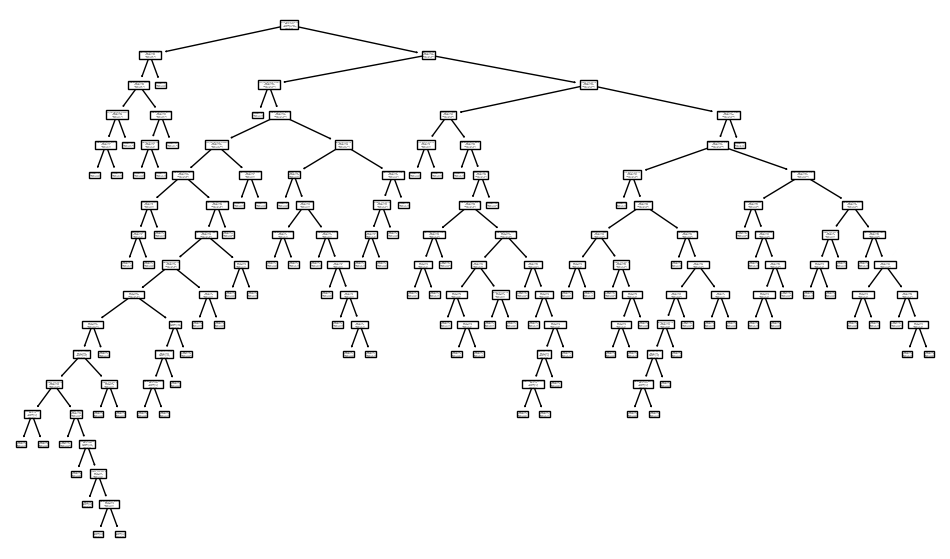

In [34]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,7))
_ = tree.plot_tree(dTreeModel, 
                   feature_names=X_train.columns,  
                   class_names=["no","yes"])

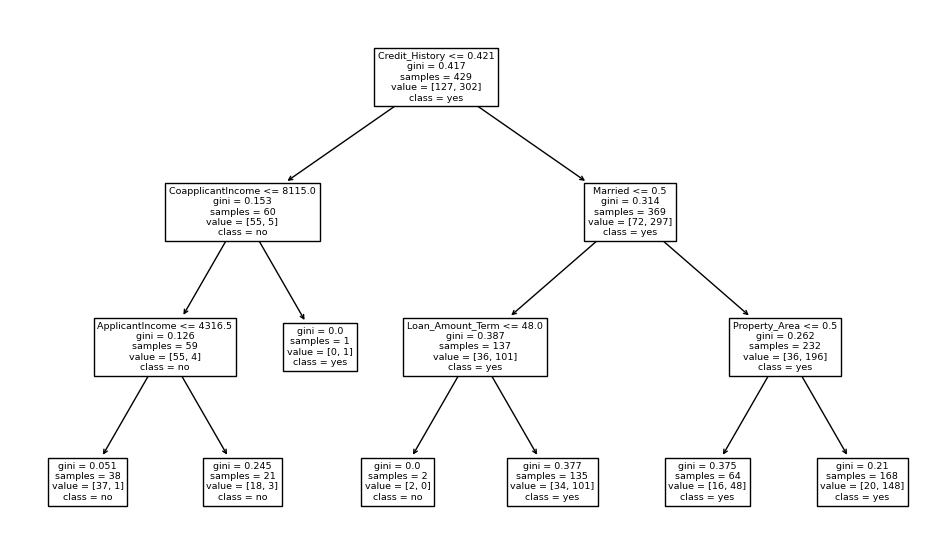

In [35]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,7))
_ = tree.plot_tree(preproned, 
                   feature_names=X_train.columns,  
                   class_names=["no","yes"])

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
model = dTreeModel

In [43]:
import ipywidgets as widgets
from IPython.display import display

# Step 2: Get the column names from x_train (assuming x_train is a pandas DataFrame)
columns = X_train.columns

# Step 3: Define the input widgets for inference
input_widgets = []

for column in columns:
    input_widgets.append(widgets.FloatText(description=f'{column}:', value=0))

# Step 5: Create a function for inference
def predict(*args):
    feature_values = [widget.value for widget in input_widgets]
    features = [feature_values]
    prediction = model.predict(features)
    print(f"Predicted Value: {prediction[0]}")

# Step 6: Create a button to trigger the inference
predict_button = widgets.Button(description='Predict')
predict_button.on_click(predict)

# Step 7: Display the form and button
form_box = widgets.VBox(input_widgets + [predict_button])
display(form_box)


Predicted Value: 1.0


C:\Users\natha\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicted Value: 1.0


C:\Users\natha\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
